

## **Loading Dataset from Drive**

**Function to Load Dataset into memory**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
import cv2


In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [3]:
base_path = r'C:\Users\Shaheryar\PycharmProjects\Store Wide Active Intelligence\Totally Cleaned and Labelled Dataset\Top Count Items\train'
val_base_path =r'C:\Users\Shaheryar\PycharmProjects\Store Wide Active Intelligence\Totally Cleaned and Labelled Dataset\Top Count Items\val'

In [4]:
print(sorted(os.listdir(val_base_path)))

['19699-Cucumber', '19701-6 Pack Tomatoes', '19705-Iceberg Lettuce', '19706-Spring Onions', '19722-Clsd Cup Mushrm', '22919-SEMI SKIMMED MILK', '23454-6 PINT WHOLE MILK', '23455-6 PINT SEMI SKIMMED', '28536-400G STRAWBERRIES', '3317-LUCOZ 1TR ORANGE', '36831-ICE MIXD PEPPERS 3PK', '37924-CHOC MAJESTICS 4PK', '40886-POT NOODLE', '50759-PEPPERONI PIZZA', '51800-WHITE ROLLS 8PK', '53629-WARB CRUMPET 9PK', '55841-LARGE EGGS 10PK', '56507-5PK BANANAS', '59044-BEEF MINCE', '62943-BABY PLUM TOMATOES', '63644-POPCORN BUCKET', '64294-BRIOCHE ROLLS 4PK', '64716-SALAD POTATOES', '65372-PEPSI MAX 3LTR', '65937-TIGER BLOOMER', '66338-SAUSAGE ROLLS', '66807-CHICKEN FILLETS', '68207-PURE LIFE WATER', '68282-TOILET TISSUE', '68905-WHITE LOAF', '69745-9PK BANANAS', '7056-WARBURTONS TOASTIE', '70820-EASY PEELERS', '71160-RED SEEDLESS GRAPES', '71781-CHICKEN SATAY 5PK', '72651-CORNED BEEF', '72842-COCA COLA CLASSIC 1L', '74901-WONDERLOAF MEDIUM', '76914-ELM SPRING WATER', '77082-CARROTS', '77734-PEPSI CH

In [5]:
for f in (sorted(os.listdir(base_path))):
      print("\""+f+"\""+",")

"19699-Cucumber",
"19701-6 Pack Tomatoes",
"19705-Iceberg Lettuce",
"19706-Spring Onions",
"19722-Clsd Cup Mushrm",
"22919-SEMI SKIMMED MILK",
"23454-6 PINT WHOLE MILK",
"23455-6 PINT SEMI SKIMMED",
"28536-400G STRAWBERRIES",
"3317-LUCOZ 1TR ORANGE",
"36831-ICE MIXD PEPPERS 3PK",
"37924-CHOC MAJESTICS 4PK",
"40886-POT NOODLE",
"50759-PEPPERONI PIZZA",
"51800-WHITE ROLLS 8PK",
"53629-WARB CRUMPET 9PK",
"55841-LARGE EGGS 10PK",
"56507-5PK BANANAS",
"59044-BEEF MINCE",
"62943-BABY PLUM TOMATOES",
"63644-POPCORN BUCKET",
"64294-BRIOCHE ROLLS 4PK",
"64716-SALAD POTATOES",
"65372-PEPSI MAX 3LTR",
"65937-TIGER BLOOMER",
"66338-SAUSAGE ROLLS",
"66807-CHICKEN FILLETS",
"68207-PURE LIFE WATER",
"68282-TOILET TISSUE",
"68905-WHITE LOAF",
"69745-9PK BANANAS",
"7056-WARBURTONS TOASTIE",
"70820-EASY PEELERS",
"71160-RED SEEDLESS GRAPES",
"71781-CHICKEN SATAY 5PK",
"72651-CORNED BEEF",
"72842-COCA COLA CLASSIC 1L",
"74901-WONDERLOAF MEDIUM",
"76914-ELM SPRING WATER",
"77082-CARROTS",
"77734-PEPSI CHE

In [6]:
CLASSES=[
"19699-Cucumber",
"19701-6 Pack Tomatoes",
"19705-Iceberg Lettuce",
"19706-Spring Onions",
"19722-Clsd Cup Mushrm",
"22919-SEMI SKIMMED MILK",
# "23454-6 PINT WHOLE MILK",
# "23455-6 PINT SEMI SKIMMED",
"28536-400G STRAWBERRIES",
"3317-LUCOZ 1TR ORANGE",
"36831-ICE MIXD PEPPERS 3PK",
"37924-CHOC MAJESTICS 4PK",
"40886-POT NOODLE",
"50759-PEPPERONI PIZZA",
"51800-WHITE ROLLS 8PK",
"53629-WARB CRUMPET 9PK",
"55841-LARGE EGGS 10PK",
"56507-5PK BANANAS",
"59044-BEEF MINCE",
"62943-BABY PLUM TOMATOES",
"63644-POPCORN BUCKET",
"64294-BRIOCHE ROLLS 4PK",
"64716-SALAD POTATOES",
"65372-PEPSI MAX 3LTR",
"65937-TIGER BLOOMER",
"66338-SAUSAGE ROLLS",
"66807-CHICKEN FILLETS",
"68207-PURE LIFE WATER",
"68282-TOILET TISSUE",
"68905-WHITE LOAF",
# "69745-9PK BANANAS",
"7056-WARBURTONS TOASTIE",
"70820-EASY PEELERS",
"71160-RED SEEDLESS GRAPES",
"71781-CHICKEN SATAY 5PK",
"72651-CORNED BEEF",
"72842-COCA COLA CLASSIC 1L",
"74901-WONDERLOAF MEDIUM",
"76914-ELM SPRING WATER",
"77082-CARROTS",
"77734-PEPSI CHERRY EF 1.5L",
# "78135-XL VEST BAG",
"79703-SMOKED BACK BACON",
"79712-ORANGE JUICE DRINK",
"79716-APPLE JUICE DRINK",
"79781-TORTILLA WRAPS",
"81309-ICE CUBES 2KG",
"8186-DC 500G CLOVER"
]
NUM_CLASSES=len(CLASSES)
print(NUM_CLASSES)

44


In [7]:
def loadDataset(dir_path):
    '''
    loads the images path and labels of CLASSES in above cell present inside dir_path
    '''
    X=[];
    y=[];

    for class_name in CLASSES:
        if(os.path.exists(os.path.join(dir_path,class_name))):
            files =os.listdir(os.path.join(dir_path,class_name))
            for f in files:
                if(f[-3:]=='png' or f[-3:]=='jpg'):
                    X.append(os.path.join(dir_path,class_name,f))
                    y.append(class_name)
                
    return pd.DataFrame({"path":X,"labels":y})


22919-SEMI SKIMMED MILK       7120
65937-TIGER BLOOMER           5035
56507-5PK BANANAS             4586
55841-LARGE EGGS 10PK         3643
68282-TOILET TISSUE           3426
7056-WARBURTONS TOASTIE       2932
68905-WHITE LOAF              2787
66338-SAUSAGE ROLLS           2718
28536-400G STRAWBERRIES       2589
19699-Cucumber                2282
72842-COCA COLA CLASSIC 1L    2112
50759-PEPPERONI PIZZA         2033
66807-CHICKEN FILLETS         1937
51800-WHITE ROLLS 8PK         1597
36831-ICE MIXD PEPPERS 3PK    1562
19722-Clsd Cup Mushrm         1534
81309-ICE CUBES 2KG           1482
79781-TORTILLA WRAPS          1466
19706-Spring Onions           1463
77082-CARROTS                 1459
63644-POPCORN BUCKET          1448
59044-BEEF MINCE              1445
79703-SMOKED BACK BACON       1426
70820-EASY PEELERS            1406
68207-PURE LIFE WATER         1406
64716-SALAD POTATOES          1396
76914-ELM SPRING WATER        1386
19701-6 Pack Tomatoes         1270
71160-RED SEEDLESS G

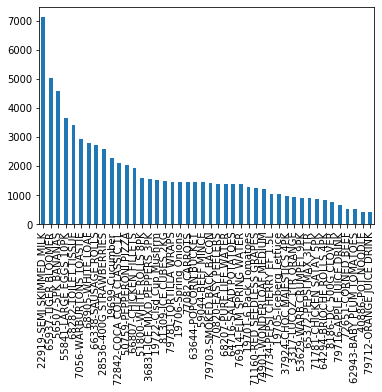

In [8]:
df=loadDataset(base_path)

print(df['labels'].value_counts())
df['labels'].value_counts().plot(kind='bar')


55841-LARGE EGGS 10PK         3144
22919-SEMI SKIMMED MILK       1992
28536-400G STRAWBERRIES       1391
65937-TIGER BLOOMER           1010
56507-5PK BANANAS              906
19699-Cucumber                 836
50759-PEPPERONI PIZZA          742
68282-TOILET TISSUE            627
66338-SAUSAGE ROLLS            583
68905-WHITE LOAF               517
19722-Clsd Cup Mushrm          459
72842-COCA COLA CLASSIC 1L     448
68207-PURE LIFE WATER          436
81309-ICE CUBES 2KG            430
7056-WARBURTONS TOASTIE        426
51800-WHITE ROLLS 8PK          426
64716-SALAD POTATOES           409
76914-ELM SPRING WATER         395
19706-Spring Onions            380
66807-CHICKEN FILLETS          363
79781-TORTILLA WRAPS           348
71160-RED SEEDLESS GRAPES      345
74901-WONDERLOAF MEDIUM        334
79703-SMOKED BACK BACON        326
19701-6 Pack Tomatoes          317
36831-ICE MIXD PEPPERS 3PK     314
70820-EASY PEELERS             310
63644-POPCORN BUCKET           306
19705-Iceberg Lettuc

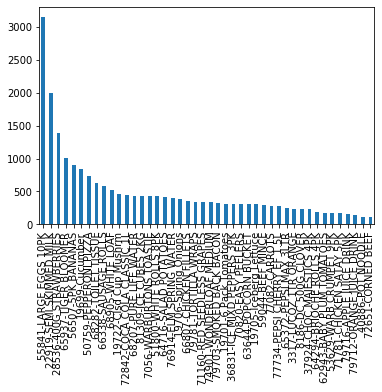

In [9]:
val_df=loadDataset(val_base_path)
print(val_df['labels'].value_counts())
val_df['labels'].value_counts().plot(kind='bar')

## **Building Model**

### `Import required modules`

In [10]:

from keras import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix
from keras import optimizers
from sklearn.metrics import classification_report
from keras.preprocessing import image
from keras.applications.mobilenet_v2 import preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D,AveragePooling2D,Flatten,Dropout,Conv2D,Conv1D
import os
import keras
from keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
# from Utils.Visualize import plotConfusionMatrix,plot_images
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support


## **Training** **Section**

In [11]:
def mobilenet_v2_custom(NUM_CLASSES,input_shape =(150, 150, 3)):
    base_model = MobileNetV2(include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    preds = Dense(NUM_CLASSES, activation='softmax')(x)
#     preds = Flatten()(x)
    # Create model
    model = Model(inputs=base_model.input, outputs=preds)
    return model

In [12]:

def startTraining(model, train_aug_df, val_df, BATCH_SIZE=32, epochs=10, checkpoint_path='mobilenet_weights'):
    
    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        horizontal_flip=True,
        vertical_flip=True)
    val_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input)

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_aug_df,
        x_col="path",
        y_col="labels",
        target_size=INPUT_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')
    validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col="path",
        y_col="labels",
        target_size=INPUT_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

    model.compile(optimizer=optimizers.SGD(lr=3e-4, 
                                       momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

    #
    try:
      os.mkdir(checkpoint_path)
    except:
      pass
    checkpoint_path = checkpoint_path + "/weights.{epoch:02d}-{val_loss:.2f}.hdf5"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    
    cp_callback = keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        verbose=0,
        monitor="val_loss",
        save_best_only=True,
        mode='min',
        save_weights_only=True,
        period=1)
    
    early_stopping_callback = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        verbose=0,
        patience=5,
        restore_best_weights=True)
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=int(train_aug_df.shape[0] / (BATCH_SIZE)),
        epochs=epochs,
        callbacks=[cp_callback,early_stopping_callback],
        validation_data=validation_generator,
        validation_steps=int(val_df.shape[0] / (BATCH_SIZE))
    )
    print(history.history.keys())
    return history


In [13]:
#configurations
INPUT_SIZE = (150,150)
WEIGHTS_TO_LOAD='../Weights/mobilenet2_weights/weights_12-0.23.hdf5'

### **Start Training**

In [14]:

train = loadDataset(base_path)
val=loadDataset(val_base_path)
#train, val = train_test_split(df, test_size=0.20, random_state=42)
print(train.shape)
print(val.shape)
model = mobilenet_v2_custom(NUM_CLASSES)
if(WEIGHTS_TO_LOAD is not None):
    model.load_weights(WEIGHTS_TO_LOAD)
# model = keras.models.load_model('Resnet50_weights/cp.h5')
model.summary()


(78346, 2)
(21875, 2)
Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Shaheryar\AppData\Roaming\Python\Python36\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                 

In [31]:
history = startTraining(model, train, val,BATCH_SIZE=64, epochs=50,checkpoint_path='mobilenet2_weights')

Found 78346 validated image filenames belonging to 44 classes.
Found 21876 validated image filenames belonging to 44 classes.
Epoch 1/50
1224/1224 [==============================] - 289s 236ms/step - loss: 2.7651 - acc: 0.3122 - val_loss: 1.4387 - val_acc: 0.6633
Epoch 2/50
1224/1224 [==============================] - 299s 244ms/step - loss: 1.0870 - acc: 0.7102 - val_loss: 0.5977 - val_acc: 0.8444
Epoch 3/50
1224/1224 [==============================] - 298s 243ms/step - loss: 0.5488 - acc: 0.8498 - val_loss: 0.3752 - val_acc: 0.8976
Epoch 4/50
1224/1224 [==============================] - 298s 243ms/step - loss: 0.3454 - acc: 0.9054 - val_loss: 0.3141 - val_acc: 0.9129
Epoch 5/50
1224/1224 [==============================] - 298s 243ms/step - loss: 0.2462 - acc: 0.9332 - val_loss: 0.2865 - val_acc: 0.9191
Epoch 6/50
1224/1224 [==============================] - 298s 244ms/step - loss: 0.1854 - acc: 0.9503 - val_loss: 0.2789 - val_acc: 0.9243
Epoch 7/50
1224/1224 [========================

### Visualize Training Graphs

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


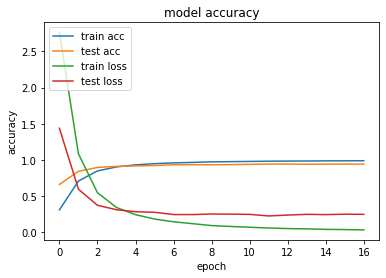

In [32]:

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'test acc', 'train loss', 'test loss'], loc='upper left')

plt.show()

## **Inference Section**


In [15]:
def inferenceImage(model,path):
    img = load_image(img_path=path,expand_dim=True)
    p=model.predict(img)
    predicted_class=CLASSES[np.argmax(p)]
    return predicted_class

def load_image(img_path,expand_dim=False):
    img = image.load_img(img_path, target_size=INPUT_SIZE)
    img_array = image.img_to_array(img)
    if(expand_dim):
        img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)
import time
def plotConfusionMatrix(mat,CLASSES):
    # Normalise
    # normalized_mat = mat.astype('float') /mat.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(mat,index=CLASSES,columns=CLASSES)
    plt.figure(figsize=(12,12))
    sn.set(font_scale=1)  # for label size
    sn.heatmap(df_cm, annot=True,fmt='d', cbar=False)  # font size
    plt.show()
def evaluateOnDataFrame(model,df):
    
    total=0
    predictions = [];
    img_paths = list(df.loc[:, 'path'])
    truth=list(df.loc[:,'labels'])
    i=0;
    print(df['labels'].value_counts())
  
    for path in img_paths:
        x = load_image(path,expand_dim=True)
      
        truth[i]=CLASSES.index(truth[i])
        t1 = time.time()
        p=model.predict(x)
        t2 = time.time()
        total=total+t2-t1
        p=np.argmax(p)
        predictions.append(p)
        i=i+1;
        
    accuracy = accuracy_score(truth,predictions)
    confusion_mat=confusion_matrix(truth,predictions)
    precsion, recall, f1_ccore, _ = precision_recall_fscore_support(truth, predictions)
    print("Total Accuracy :",round(accuracy*100,2))
    # print("Precision :", (precsion*100))
    # print("Recall :",(recall*100))
    for j in range(0,len(CLASSES)):
        print(CLASSES[j],"F1 score :", round(f1_ccore[j]*100,2))
    print(classification_report(truth,predictions,target_names=CLASSES))
    print("Average inference time :",total/len(df))
    plotConfusionMatrix(confusion_mat,CLASSES)
    return truth, predictions

### **Evaluate on Test Data**

55841-LARGE EGGS 10PK         3144
22919-SEMI SKIMMED MILK       1992
28536-400G STRAWBERRIES       1391
65937-TIGER BLOOMER           1010
56507-5PK BANANAS              906
19699-Cucumber                 836
50759-PEPPERONI PIZZA          742
68282-TOILET TISSUE            627
66338-SAUSAGE ROLLS            583
68905-WHITE LOAF               517
19722-Clsd Cup Mushrm          459
72842-COCA COLA CLASSIC 1L     448
68207-PURE LIFE WATER          436
81309-ICE CUBES 2KG            430
7056-WARBURTONS TOASTIE        426
51800-WHITE ROLLS 8PK          426
64716-SALAD POTATOES           409
76914-ELM SPRING WATER         395
19706-Spring Onions            380
66807-CHICKEN FILLETS          363
79781-TORTILLA WRAPS           348
71160-RED SEEDLESS GRAPES      345
74901-WONDERLOAF MEDIUM        334
79703-SMOKED BACK BACON        326
19701-6 Pack Tomatoes          317
36831-ICE MIXD PEPPERS 3PK     314
70820-EASY PEELERS             310
63644-POPCORN BUCKET           306
19705-Iceberg Lettuc

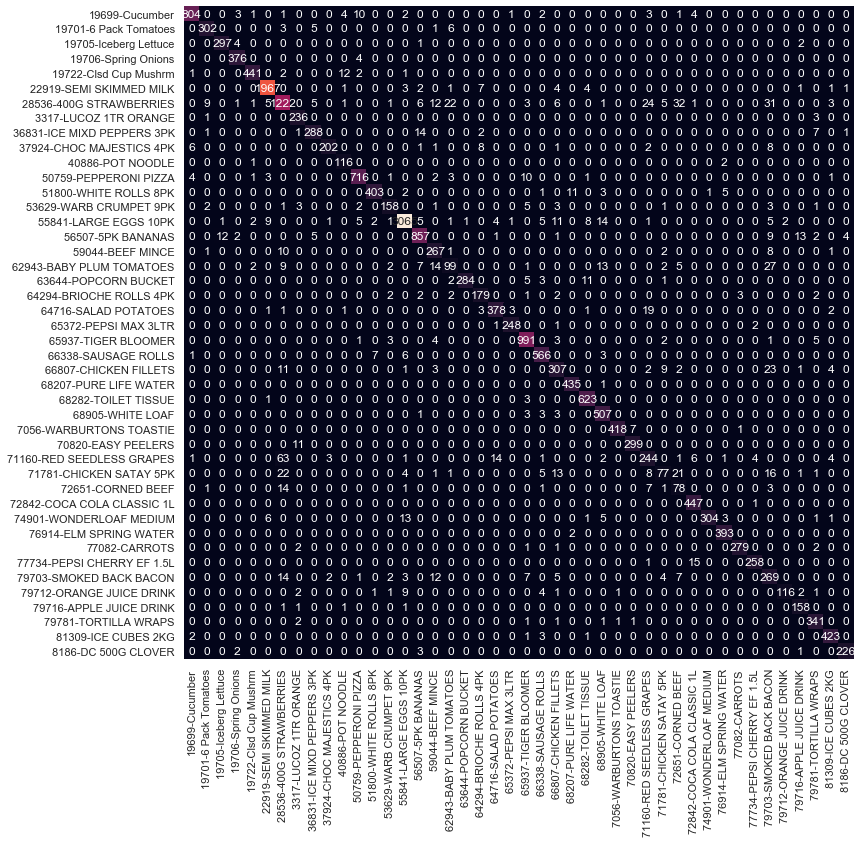

In [18]:
truth, predictions=evaluateOnDataFrame(model,val_df)

In [17]:
#Error Analysis
from math import sqrt
def analyse(val_df,predictions,truth):
    truth = np.array(truth)
    predictions=np.array(predictions)
    wrong_predictions_idx=[truth!=predictions]
    true_labels=(list(val_df.loc[wrong_predictions_idx[0]]['labels']))
    wrong_predictions=(predictions[wrong_predictions_idx])
    wrong_predictions_paths=list((val_df.loc[wrong_predictions_idx[0]]['path']))
    imgs_list = []
    print(len(wrong_predictions_paths))
    wrong_predictions_labels = []
    for i in range(len(wrong_predictions_paths)):
        file_path=wrong_predictions_paths[i]
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs_list.append(img)
        wrong_predictions_labels.append(CLASSES[wrong_predictions[i]])
        if(i%9==0 and i != 0):
            plot_images2(imgs_list[i-9:i], cls_true=true_labels[i-9:i], cls_pred=wrong_predictions_labels[i-9:i])
         
analyse(val_df,predictions,truth)

NameError: name 'predictions' is not defined

In [22]:
from math import sqrt
def plot_images2(images, cls_true, cls_pred=None):
    # Create figure with 3x3 sub-plots.
    plt.figure(figsize=(12, 12))
    count = len(images)
    print(count)
    fig, axes = plt.subplots(int(sqrt(count)), int(sqrt(count)),figsize=(12, 12))


    #     fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i])
        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.tight_layout()
    plt.show()

def testRandom(model,df,count =4):
  idx=np.random.randint(0,df.shape[0],count)
  file_path_list=list(df.loc[idx,'path'])
  true_labels =list(df.loc[idx,'labels'])
  img_list =[];
  predicted_labels=[]
  for file_path in file_path_list:
      img = cv2.imread(file_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img_list.append(img)
      prediction=inferenceImage(model,file_path)
      predicted_labels.append(prediction)
    
  plot_images2(img_list,true_labels,predicted_labels)
    

In [23]:
testRandom(model,df,count=9)

NameError: name 'inferenceImage' is not defined

In [41]:
# Predicting from image path
from PIL import Image

for i in range(0,10):
    input_image_path='../Dataset/val/19699-Cucumber/frame2020-07-30 19-25-36_661834.jpg'
    img=load_image(input_image_path,False)
    t1 = time.time()
    p=model.predict(np.array([img]))
    print(time.time()-t1)
    predicted_class=CLASSES[np.argmax(p)]
    print("Predicted class :",np.argmax(p),predicted_class)

0.006737470626831055
Predicted class : 0 19699-Cucumber
0.006337404251098633
Predicted class : 0 19699-Cucumber
0.006012439727783203
Predicted class : 0 19699-Cucumber
0.005874156951904297
Predicted class : 0 19699-Cucumber
0.005796909332275391
Predicted class : 0 19699-Cucumber
0.005854606628417969
Predicted class : 0 19699-Cucumber
0.005809783935546875
Predicted class : 0 19699-Cucumber
0.0058972835540771484
Predicted class : 0 19699-Cucumber
0.0058934688568115234
Predicted class : 0 19699-Cucumber
0.005867719650268555
Predicted class : 0 19699-Cucumber
